In [88]:
import pandas as pd
trainP = pd.read_csv("train.csv",nrows=5000000)


In [89]:
y_df = trainP.loc[:,"click"]
unscaled = trainP.drop(['id','site_id','site_domain','hour','app_id','device_id','device_model','app_domain','device_ip','device_type','device_conn_type','banner_pos','site_category','app_category','click'],axis=1)
x_df = (unscaled-unscaled.min())/(unscaled.max()-unscaled.min())

split = 0.7*trainP.shape[0] 
x_trainP = x_df.loc[:split-1, :] 
x_testP = x_df.loc[split:, :] 
y_trainP = y_df.loc[:split-1]
y_testP = y_df.loc[split:]
x_trainP.shape

(3500000, 9)

In [90]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [91]:
def logistic(w, x):
  a = torch.sum(w*x)
  ea = torch.exp(a)
  return (ea/(ea+1))

In [92]:
def bin_cross_entropy(weights,size,x,y,mini_batch):
    sum = 0
    for i in range(size):
        y_i = y[mini_batch[i]]
        y_hat = logistic(weights,x[mini_batch[i]])
        sum += ((y_i * torch.log(y_hat)) + ((1 - y_i)*torch.log(1-y_hat)))
    return -1 * sum

In [93]:
def partial_derivative(weights,w_index,size,x,y,mini_batch):
    sum = 0
    for i in range(size):
        y_i = y[mini_batch[i]]
        y_hat = logistic(weights,x[mini_batch[i]])
        sum += (y_hat-y_i) * x[mini_batch[i]][w_index]
    return sum


In [94]:
x_train = torch.tensor(x_trainP.to_numpy())
y_train = torch.tensor(y_trainP.to_numpy())
x_test = torch.tensor(x_testP.to_numpy())
y_test = torch.tensor(y_testP.to_numpy())

#Order
M = x_train.size(dim=1)
W = torch.rand(M)

#Mini-Batch
batch_size = 30
miniB = torch.randint(x_train.size(dim=0), (batch_size,))
print(x_train.size(dim=0))
#Learning Rate
n = 0.1

#Epochs
epoch = 100

3500000


In [95]:
loss = []
for i in range(0,epoch):
  loss.append(bin_cross_entropy(W,batch_size,x_train,y_train,miniB))
  w_temp = torch.zeros(M)
  for j in range(0,M):
    w_temp[j] = W[j] - (n * partial_derivative(W,j,batch_size,x_train,y_train,miniB))
  W = w_temp

In [96]:
prob = torch.zeros(x_test.size(dim=0))
for i in range(x_test.size(dim=0)):
    prob[i] = (logistic(W,x_test[i]))

threshold = 0.5
predictions = (prob >= threshold).int()

TP = ((predictions == 1) & (y_test == 1)).sum().item()
FP = ((predictions == 1) & (y_test == 0)).sum().item()
FN = ((predictions == 0) & (y_test == 1)).sum().item()


In [97]:
recall = []
precision = []

thresholds = torch.linspace(0.0, 1.0, steps = 100)
for i in thresholds:
    predictions = (prob >= i).int()
    
    TP = ((predictions == 1) & (y_test == 1)).sum().item()
    FP = ((predictions == 1) & (y_test == 0)).sum().item()
    FN = ((predictions == 0) & (y_test == 1)).sum().item()
    
    recall.append(TP/(TP+FN))
    if(TP == 0 & FP == 0):
        precision.append(0)
        continue
    precision.append(TP/(TP+FP))

Text(0, 0.5, 'precision')

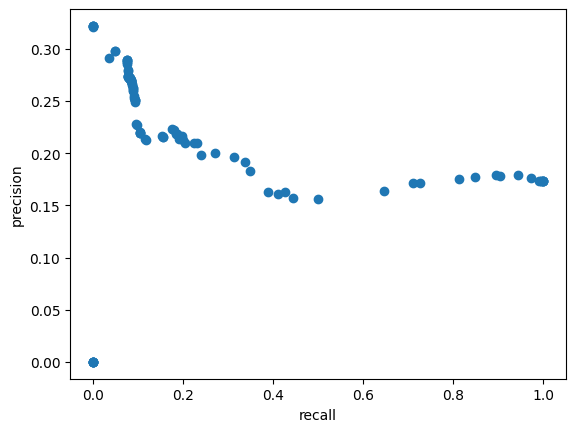

In [98]:
plt.scatter(recall,precision, label='recall v precision')
plt.xlabel('recall')
plt.ylabel('precision')